In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#import seaborn as sns
from scipy.stats import stats
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import Image
style.use('ggplot')

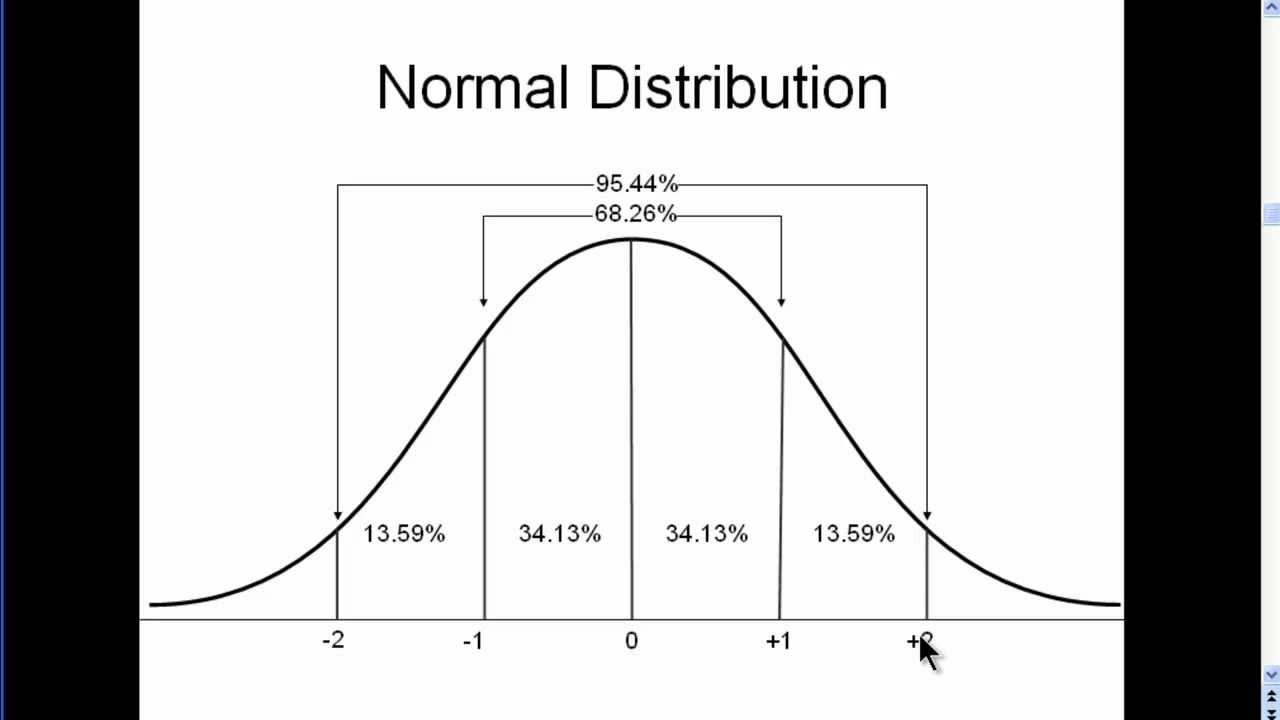

In [3]:
Image(filename='normal_dist.png')

In [4]:
df = pd.read_csv('data/train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
totalincome          float64
dtype: object

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,totalincome
count,614.000000,614.000000,614.000000,614.000000,564.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.842199,7024.705081
std,6109.041673,2926.248369,84.180967,64.428629,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [3]:
print("Table Missing values:")
print("--------------------------")
print(df.apply(lambda x: sum(x.isnull()),axis=0))
print(df.apply(lambda x: len(x),axis=0))

Table Missing values:
--------------------------
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
totalincome           0
dtype: int64
Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
totalincome          614
dtype: int64


In [5]:
df['Gender'].fillna("Male",inplace=True)
print(df['Gender'].mode())
print(df['Gender'].unique())

0    Male
dtype: object
['Male' 'Female']


In [4]:
#used below
df1['Dependents'].fillna("0",inplace=True)
print(df1['Dependents'].mode())
print(df1['Dependents'].unique())

0    0
dtype: object
['0' '1' '2' '3+']


In [8]:
#df['Self_Employed'].fillna("No",inplace=True)
print(df['Self_Employed'].mode())
print(df['Self_Employed'].unique())

0    No
dtype: object
['No' 'Yes']


In [10]:
df['Married'].fillna("Yes",inplace=True)
print(df['Married'].mode())
print(df['Married'].unique())

0    Yes
dtype: object
['No' 'Yes']


In [12]:
df['Credit_History'].fillna('1',inplace=True)
print(df['Credit_History'].mode())
print(df['Credit_History'].unique())

0    1
dtype: object
[1.0 0.0 '1']


In [6]:
df1.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
totalincome          False
dtype: bool

# Filling Values in dependents by comparing values from another column

In [3]:
df1=pd.read_csv('data/train2.csv',index_col=0)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [48]:
#stats = {'Dependents':[]}
#df2 = pd.DataFrame(np.array(df1[['Married','Dependents']]))
#df2

#test = np.array(df1[['Married','Dependents']])
test[1]

array(['Yes', '1'], dtype=object)

In [43]:
def fill(x):
    if (x[0]=='Yes' and x[1]==np.nan):
        return '3'
    elif (x[0]=='No' and x[1]==np.nan):
        return '2'

df2[1] = df2.apply(lambda x:fill(x),axis=1)
print(df2[1].unique())

[None]


In [31]:
print(df2.apply(lambda x: sum(x.isnull()),axis=0))

Dependents    15
dtype: int64


In [50]:
df1.loc[597]

Loan_ID               LP002943
Gender                    Male
Married                     No
Dependents                 NaN
Education             Graduate
Self_Employed               No
ApplicantIncome           2987
CoapplicantIncome            0
LoanAmount                  88
Loan_Amount_Term           360
Credit_History               0
Property_Area        Semiurban
Loan_Status                  N
totalincome               2987
Name: 597, dtype: object

# Correlation

In [96]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed',
           'Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
print(df.dtypes)
print(df.apply(lambda x: sum(x.isnull()),axis=0))
print(df.columns)
corr=df[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].corr()


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
totalincome          float64
dtype: object
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
totalincome          0
dtype: int64
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'totalincome'],
 

In [97]:
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.076120,-0.022549
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.009500,0.010522,-0.047414,-0.076120,1.000000,0.032112


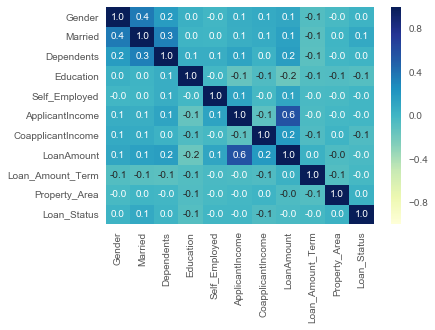

In [98]:
sns.heatmap(corr,annot=True,fmt=".1f",cmap="YlGnBu")

# Final DataSet- train2

In [5]:
#df1.to_csv('train2.csv')
df = pd.read_csv("data/train3.csv",index_col=0)
#df1 = pd.read_csv("train3.csv",index_col=0)
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,1,0,0,0,1,5849,0.0,120,360,1,1,1,5849.0
1,LP001003,1,1,1,0,1,4583,1508.0,128,360,1,-1,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66,360,1,1,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120,360,1,1,1,4941.0
4,LP001008,1,0,0,0,1,6000,0.0,141,360,1,1,1,6000.0
5,LP001011,1,1,2,1,1,5417,4196.0,267,360,1,1,1,9613.0
6,LP001013,1,1,0,0,0,2333,1516.0,95,360,1,1,1,3849.0
7,LP001014,1,1,3,0,1,3036,2504.0,158,360,0,0,0,5540.0
8,LP001018,1,1,2,0,1,4006,1526.0,168,360,1,1,1,5532.0
9,LP001020,1,1,1,0,1,12841,10968.0,349,360,1,0,0,23809.0


# Converting dataset into numeric

In [26]:
#df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
#df['Property_Area '] = df['Property_Area'].map({'Urban':1,'Rural':-1,'Semiurban':0})
#df['Married'] = df['Married'].map({'Yes':1,'No':0})
#df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
###df['Self_Employed '] = df['Self_Employed'].map({'No':0,'Yes':1})
###df['Gender '] = df['Gender'].map({'Male':1,'Female':0})
df.to_csv('train3.csv')

# Training testing data/Logistic Regression

A KFold split will take the data and split it however many times you designate. StratifiedKFold is used in order to ensure that your training and validation datasets each contain the same percentage of classes (see sklearn documentation for more). The function StratifiedKFold takes two arguments, the array of labels (for binary classification this would be an array of 1's and 0's) and the number of folds. They have designated the number of folds as 1./eval_size where eval_size = 0.10. So this is a 10-fold validation.

In [33]:
from sklearn.model_selection import StratifiedKFold
target = df1['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.25, random_state=0)
print(y_train)

kf = StratifiedKFold(n_splits=25, shuffle=True, random_state=0)
print(kf)

46     1
272    1
474    1
382    1
283    1
107    0
205    1
384    0
0      1
202    0
71     1
170    1
102    1
407    1
108    0
573    0
613    0
313    1
509    1
419    1
298    0
492    1
480    1
26     1
604    1
332    1
242    1
515    1
582    1
225    0
      ..
151    1
244    1
543    1
544    1
265    1
288    1
423    0
147    1
177    0
99     1
448    0
431    0
115    1
72     1
537    1
174    0
87     1
551    1
486    0
314    0
396    0
600    0
472    1
70     1
599    1
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 460, dtype: int64
StratifiedKFold(n_splits=25, random_state=0, shuffle=True)


In [31]:
df1.drop(['Loan_ID'],axis=1,inplace = True)

cross_val_score 0.995672514619883

classification_report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00       111

avg / total       1.00      1.00      1.00       154

accuracy_score 1.0

Confusion matrix, without normalization
[[ 43   0]
 [  0 111]]
Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


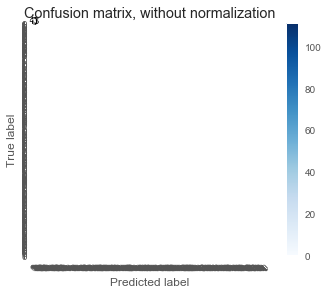

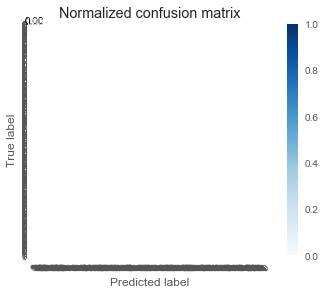

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import itertools

modelLR = LogisticRegression(warm_start=True,
                             max_iter=200,
                             fit_intercept=True)
modelLR.fit(X_train,y_train)

score_val = np.mean(cross_val_score(modelLR, X_train, y_train, cv=kf, scoring='accuracy') )
predicted = modelLR.predict(X_test)

print('cross_val_score {}\n'.format(score_val))
print('classification_report\n', metrics.classification_report(y_test, predicted))
print('accuracy_score {}\n'.format(metrics.accuracy_score(y_test, predicted)))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
#plot_confusion_matrix(cm)

plt.figure()
plot_confusion_matrix(cm, classes=target,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=target, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



# IV Value

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


train_data=pd.read_csv('train3.csv', parse_dates=True)
df = pd.DataFrame(train_data)
print(df)
print(df.shape)

#--------TotalIncome-----Loan_Status
def predictCon_IV(feature,min,max,bin,m):
    bins = np.linspace(min, max, bin)
    df['bin'] = pd.cut(feature[0:m],bins=bins)
    print('bin',df['bin'])
    melted = pd.melt(df, id_vars = 'bin' , value_vars = ['Loan_Status'])
    print('Melted',melted)
    df4 = pd.crosstab(melted.bin , melted.value)
    df4['%N'] = ((df4['N'])/df4['N'].sum())
    df4['%Y'] = ((df4['Y'])/df4['Y'].sum())
    df4['WOE'] = np.log(df4['%N']/df4['%Y'])
    df4['AWOE'] = np.log(((df4['N']+0.5)/df4['N'].sum())/((df4['Y']+0.5)/df4['Y'].sum()))
    df4['IV'] = np.where(isinstance(df4['WOE'],float),(df4['%N'] - df4['%Y'])*df4['WOE'],(df4['%N'] - df4['%Y'])*df4['AWOE'])
    return df4['IV'].sum()

def predictDis_IV(feature,m):
    df4 = pd.crosstab(feature[0:m],df['Loan_Status'])
    df4.columns = ['N','Y']
    df4['%N'] = ((df4['N'])/(df4['N'].sum()))
    df4['%Y'] = ((df4['Y'])/(df4['Y'].sum()))
    df4['WOE'] = np.log(df4['%N']/df4['%Y'])
    df4['AWOE'] = np.log(((df4['N']+0.5)/df4['N'].sum())/((df4['Y']+0.5)/df4['Y'].sum()))
    df4['IV'] = np.where(isinstance(df4['WOE'],float),(df4['%N'] - df4['%Y'])*df4['WOE'],(df4['%N'] - df4['%Y'])*df4['AWOE'])

    return df4['IV'].sum()
   

m =  50 #no. of rows
 
Applicant_Income = predictCon_IV(df.ApplicantIncome,df.ApplicantIncome.min(),18000,10,m)
Coapplicant_Income = predictCon_IV(df.CoapplicantIncome,df.CoapplicantIncome.min(),8000,5,m)
LoanAmount = predictCon_IV(df.LoanAmount,df.LoanAmount.min(),400,10,m)
Credit_History = predictDis_IV(df.Credit_History,m)
Gender = predictDis_IV(df.Gender,m)
Married = predictDis_IV(df.Married,m)
Dependents = predictDis_IV(df.Dependents,m)
Education = predictDis_IV(df.Education,m)   
Self_Employed = predictDis_IV(df.Self_Employed,m)                       
Property_Area = predictDis_IV(df.Property_Area,m)




print('\nApplicantIncome:- ',Applicant_Income)
print('\ncoApplicantIncome:- ',Coapplicant_Income)
print('\nLoanAmount:- ',LoanAmount)
print('\nCredit_History:- ',Credit_History)
print('\nGender:- ',Gender)
print('\nMarried:- ',Married)
print('\nDependents:- ',Dependents)
print('\nEducation:- ',Education)
print('\nSelf_Employed:- ',Self_Employed)
print('\nProperty_Area:- ',Property_Area)



names = ('Credit_History','Gender','Married','Dependents','Education','Self_Employed','Applicant_Income','Coapplicant_Income','LoanAmount','Property_Area')
objects = (Credit_History,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Property_Area)
X = np.arange(len(objects))


colors = []
for value in objects:
    if  value < 0.02:
        colors.append('k')
    elif 0.02 <= value < 0.1:
        colors.append('b')
    elif 0.1 <= value < 0.3:
        colors.append('y')
    elif 0.3 <= value < 0.5:
        colors.append('g')
    else:
        colors.append('r')
   

black_patch = mpatches.Patch(color='k', label='useless for prediction')
blue_patch = mpatches.Patch(color='b', label='Weak predictor')
yellow_patch = mpatches.Patch(color='y', label='Medium predictor')
green_patch = mpatches.Patch(color='g', label='Strong predictor')
red_patch = mpatches.Patch(color='r', label='Suspicious or too good to be true')
plt.legend(handles=[black_patch,blue_patch,yellow_patch,green_patch,red_patch,])
plt.title('No. of rows ' + str(m))
plt.xticks(X,names,rotation=45)
plt.bar(X, objects, color = colors)
plt.show()

     Unnamed: 0   Loan_ID  Gender   Married  Dependents  Self_Employed   \
0             0  LP001002        1        0           0               0   
1             1  LP001003        1        1           1               0   
2             2  LP001005        1        1           0               1   
3             3  LP001006        1        1           0               0   
4             4  LP001008        1        0           0               0   
5             5  LP001011        1        1           2               1   
6             6  LP001013        1        1           0               0   
7             7  LP001014        1        1           3               0   
8             8  LP001018        1        1           2               0   
9             9  LP001020        1        1           1               0   
10           10  LP001024        1        1           2               0   
11           11  LP001027        1        1           2               0   
12           12  LP001028

KeyError: 'N'

# Feature Selection

**RFE**

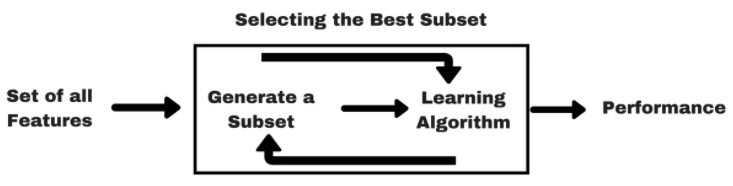

In [30]:
from IPython.display import Image
Image(filename='rfe1.png')

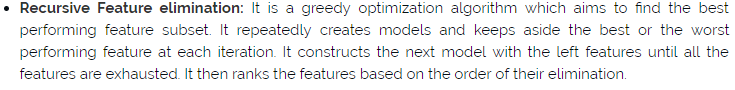

In [29]:
Image(filename='rfe2.png')

**RFE**LogisticRegression

In [4]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC

#df = pd.read_csv('train3.csv',index_col=None)
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, n_features_to_select=6)

X = np.array(df.drop(['Loan_Status','Loan_ID'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])

rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False  True  True False  True  True False]
[5 1 3 7 1 4 1 1 2 1 1 6]


In [3]:
df = pd.DataFrame.copy(df.loc[:, ~df.columns.str.contains('^Unnamed')])
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,1,0,0,0,1,5849,0.0,120,360,1,1,1,5849.0
1,LP001003,1,1,1,0,1,4583,1508.0,128,360,1,-1,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66,360,1,1,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120,360,1,1,1,4941.0
4,LP001008,1,0,0,0,1,6000,0.0,141,360,1,1,1,6000.0


In [60]:
df1 = df.drop(['Loan_Status',
               'Loan_ID',
               #'Gender',
              'Dependents',
               #'Self_Employed',
              'ApplicantIncome',
               #'Loan_Amount_term',
               'totalincome'], axis=1)
#df1

In [5]:
df1 = pd.read_csv('feature_rfe.csv',index_col=0)
df1.head()

,Married,Education,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,360,1,1
1,1,1,1508.0,360,1,-1
2,1,1,0.0,360,1,1
3,1,0,2358.0,360,1,1
4,0,1,0.0,360,1,1


In [15]:
from sklearn import model_selection,svm
X_train, X_test, y_train, y_test = model_selection.train_test_split(df1, df['Loan_Status'], test_size=0.2)

clf_LR = LogisticRegression()
clf_SVM = svm.SVC()

clf_LR.fit(X_train,y_train)
clf_SVM.fit(X_train,y_train)

confidence_LR = clf_LR.score(X_test, y_test)
confidence_SVM = clf_SVM.score(X_test, y_test)

print(confidence_LR)
print(confidence_SVM)

example_measures = np.array([[1,0,0,360,0,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction_LR = clf_LR.predict(example_measures)
prediction_SVM = clf_SVM.predict(example_measures)

print(prediction_LR)
print(prediction_SVM)

0.837398373984
0.788617886179
[0]
[0]


In [81]:
model_svc = svm.SVC()
# create the RFE model and select 6 attributes
rfe = RFE(model, n_features_to_select=6)

X = np.array(df.drop(['Loan_Status','Loan_ID'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])

rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False  True  True False  True  True False]
[5 1 3 7 1 4 1 1 2 1 1 6]


**ExtraTress_RandomForest**

In [92]:
# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# fit an Extra Trees model to the data
model_extratrees = ExtraTreesClassifier()
model_randomforest = RandomForestClassifier()

model_extratrees.fit(X, y)
model_randomforest.fit(X,y)
# display the relative importance of each attribute
print(model_extratrees.feature_importances_)
print(model_randomforest.feature_importances_)

df2 = df.drop(['Loan_Status','Loan_ID'], axis=1)
print(df2.dtypes)

df3 = pd.DataFrame({ 'Feature':df2.dtypes,
                     'feature_imp_extratrees':np.array(model_extratrees.feature_importances_),
                     'feature_imp_randomforest':np.array(model_randomforest.feature_importances_)
                   })

df3

[ 0.02479711  0.01629877  0.05695593  0.02170115  0.01843151  0.13463708
  0.09680932  0.13174674  0.04630784  0.27661247  0.04514952  0.13055255]
[ 0.01365748  0.02305418  0.04286312  0.01672846  0.01777461  0.14771918
  0.09601639  0.15554588  0.03590367  0.24550942  0.04019364  0.16503397]
Gender                 int64
Married                int64
Dependents             int64
Self_Employed          int64
Education              int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
totalincome          float64
dtype: object


,Feature,feature_imp_extratrees,feature_imp_randomforest
Gender,int64,0.024797,0.013657
Married,int64,0.016299,0.023054
Dependents,int64,0.056956,0.042863
Self_Employed,int64,0.021701,0.016728
Education,int64,0.018432,0.017775
ApplicantIncome,int64,0.134637,0.147719
CoapplicantIncome,float64,0.096809,0.096016
LoanAmount,int64,0.131747,0.155546
Loan_Amount_Term,int64,0.046308,0.035904
Credit_History,int64,0.276612,0.245509


In [98]:
df4 = df.drop(['Married',
               #'Self_Employed',
               'Education',
               #'Gender',
               'Loan_Amount_Term',
               'Property_Area',
              'Loan_ID'],1)
df4.to_csv('feature_elm_et_rf.csv')

In [6]:
df4 = pd.read_csv('feature_elm_et_rf.csv')
df4

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,totalincome
0,0,5849,0.0,120,1,1,5849.0
1,1,4583,1508.0,128,1,0,6091.0
2,0,3000,0.0,66,1,1,3000.0
3,0,2583,2358.0,120,1,1,4941.0
4,0,6000,0.0,141,1,1,6000.0
5,2,5417,4196.0,267,1,1,9613.0
6,0,2333,1516.0,95,1,1,3849.0
7,3,3036,2504.0,158,0,0,5540.0
8,2,4006,1526.0,168,1,1,5532.0
9,1,12841,10968.0,349,1,0,23809.0


In [18]:
X = np.array(df4.drop(['Loan_Status'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf_LR = LogisticRegression()
clf_SVM = svm.SVC()

clf_LR.fit(X_train,y_train)
clf_SVM.fit(X_train,y_train)

confidence_LR = clf_LR.score(X_test, y_test)
confidence_SVM = clf_SVM.score(X_test, y_test)

print(confidence_LR)
print(confidence_SVM)

example_measures = np.array([[1,0,0,360,1,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction_LR = clf_LR.predict(example_measures)
prediction_SVM = clf_SVM.predict(example_measures)

print(prediction_LR)
print(prediction_SVM)

0.869918699187
0.861788617886
[0]
[1]


In [22]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import SelectPercentile, f_classif
# load data

X = np.array(df.drop(['Loan_Status','Loan_ID','Property_Area'], 1).astype(float))
#X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])
# feature extraction
test = SelectKBest(score_func=chi2, k=6)
clf = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
print(clf.scores_)
features = clf.transform(X)
# summarize selected features
print(features[0:5,:])

[  3.623e-02   1.782e+00   8.595e-02   7.285e-03   9.884e-01   9.390e+01
   1.134e+04   3.021e+01   3.779e+00   2.601e+01   3.560e+03]
[[  5.849e+03   0.000e+00   1.200e+02   3.600e+02   1.000e+00   5.849e+03]
 [  4.583e+03   1.508e+03   1.280e+02   3.600e+02   1.000e+00   6.091e+03]
 [  3.000e+03   0.000e+00   6.600e+01   3.600e+02   1.000e+00   3.000e+03]
 [  2.583e+03   2.358e+03   1.200e+02   3.600e+02   1.000e+00   4.941e+03]
 [  6.000e+03   0.000e+00   1.410e+02   3.600e+02   1.000e+00   6.000e+03]]


In [19]:
#X
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,1,0,0,0,1,5849,0.0,120,360,1,1,1,5849.0
1,LP001003,1,1,1,0,1,4583,1508.0,128,360,1,-1,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66,360,1,1,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120,360,1,1,1,4941.0
4,LP001008,1,0,0,0,1,6000,0.0,141,360,1,1,1,6000.0
5,LP001011,1,1,2,1,1,5417,4196.0,267,360,1,1,1,9613.0
6,LP001013,1,1,0,0,0,2333,1516.0,95,360,1,1,1,3849.0
7,LP001014,1,1,3,0,1,3036,2504.0,158,360,0,0,0,5540.0
8,LP001018,1,1,2,0,1,4006,1526.0,168,360,1,1,1,5532.0
9,LP001020,1,1,1,0,1,12841,10968.0,349,360,1,0,0,23809.0


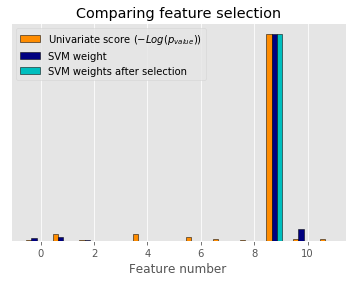

In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm
style.use('ggplot')

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(X.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
plt.show()

#clf = svm.SVC(kernel='linear')
#clf.fit(X, y)

#svm_weights = (clf.coef_ ** 2).sum(axis=0)
#svm_weights /= svm_weights.max()

#plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
#        color='navy', edgecolor='black')

#clf_selected = svm.SVC(kernel='linear')
#clf_selected.fit(selector.transform(X), y)

#svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
#svm_weights_selected /= svm_weights_selected.max()

#plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
#        width=.2, label='SVM weights after selection', color='c',
#        edgecolor='black')

#plt.title("Comparing feature selection")
#plt.xlabel('Feature number')
#plt.yticks(())
#plt.axis('tight')
#plt.legend(loc='upper left')
#plt.show()

In [27]:
#http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
X = np.array(df.drop(['Loan_Status','Loan_ID'], 1).astype(float))
#X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)
print(clf.)

<function Pipeline.score at 0x00000154921D5620>


In [102]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

X = np.array(df.drop(['Loan_ID','Loan_Status'],1).astype(float))
y = np.array(df['Loan_Status'])
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='auto', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
print(feat_selector.support_)

# check ranking of features
print(feat_selector.ranking_)

# call transform() on X to filter it down to selected features
#X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	34 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	10


BorutaPy finished running.

Iteration: 	35 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	10
[False False False False False False False False False  True False  True]
[11  7  9 10  8  3  4  2  6  1  5  1]


C:\Users\Sonia\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


In [105]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X = np.array(df.drop(['Loan_Status','Loan_ID'], 1).astype(float))
#X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])
print(X.shape)

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)               


(614, 12)
(614, 5)


In [106]:
df_test = df.drop(['Loan_Status','Loan_ID'],1)
df_test1 = pd.DataFrame({ 'Feature':df_test.dtypes,
                     'Selected_Features':np.array(model.get_support())
                   })
df_test1

,Feature,Selected_Features
Gender,int64,False
Married,int64,False
Dependents,int64,False
Self_Employed,int64,False
Education,int64,False
ApplicantIncome,int64,True
CoapplicantIncome,float64,True
LoanAmount,int64,True
Loan_Amount_Term,int64,False
Credit_History,int64,True


In [9]:
import pandas as pd
df_selectfrommodel = pd.read_csv('selectfrommodel.csv')
df_selectfrommodel

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,totalincome
0,5849,0.0,120,1,5849.0
1,4583,1508.0,128,1,6091.0
2,3000,0.0,66,1,3000.0
3,2583,2358.0,120,1,4941.0
4,6000,0.0,141,1,6000.0
5,5417,4196.0,267,1,9613.0
6,2333,1516.0,95,1,3849.0
7,3036,2504.0,158,0,5540.0
8,4006,1526.0,168,1,5532.0
9,12841,10968.0,349,1,23809.0


In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
#from sklearn import processing
from sklearn.model_selection import train_test_split

X = np.array(df_selectfrommodel.astype(float))
#X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_LR = LogisticRegression()
clf_SVM = svm.SVC()

clf_LR.fit(X_train,y_train)
clf_SVM.fit(X_train,y_train)

confidence_LR = clf_LR.score(X_test, y_test)
confidence_SVM = clf_SVM.score(X_test, y_test)

print(confidence_LR)
print(confidence_SVM)

example_measures = np.array([[3200,700,70,1,3900]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction_LR = clf_LR.predict(example_measures)
prediction_SVM = clf_SVM.predict(example_measures)

print(prediction_LR)
print(prediction_SVM)

0.813008130081
0.715447154472
[1]
[1]


# Clustering

In [47]:
from sklearn.cluster import KMeans

X_rfe= np.array(df1.astype(float))
X_rfe = preprocessing.scale(X_rfe)
y = np.array(df['Loan_Status'])

clf_kmeans = KMeans(n_clusters=2)
clf_kmeans.fit(X_rfe)

correct = 0
for i in range(len(X_rfe)):
    predict_me = np.array(X_rfe[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf_kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X_rfe))

example_measures = np.array([[1,0,0,360,1,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf_kmeans.predict(example_measures)

print(prediction)

0.5960912052117264
[0]


In [42]:
X_extratrees_randomforest = np.array(df4.drop(['Loan_Status'],1).astype(float))
X_extratrees_randomforest = preprocessing.scale(X_extratrees_randomforest)

clf_kmeans = KMeans(n_clusters=2)
clf_kmeans.fit(X_extratrees_randomforest)

correct = 0
for i in range(len(X_extratrees_randomforest)):
    predict_me = np.array(X_extratrees_randomforest[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf_kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X_extratrees_randomforest))

example_measures = np.array([[1,0,0,360,1,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf_kmeans.predict(example_measures)

print(prediction)

0.6807817589576547
[0]


In [7]:
from sklearn.cluster import KMeans
X= np.array(df.drop(['Loan_ID','Loan_Status'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])

clf_kmeans = KMeans(n_clusters=2)
clf_kmeans.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf_kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

example_measures = np.array([[0,0,2,0,0,1000,0,800,360,0,-1,1000]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf_kmeans.predict(example_measures)

print(prediction)

0.6775244299674267
[0]


In [56]:
df_selectfrommodel.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,totalincome
0,5849,0.0,120,1,5849.0
1,4583,1508.0,128,1,6091.0
2,3000,0.0,66,1,3000.0
3,2583,2358.0,120,1,4941.0
4,6000,0.0,141,1,6000.0


In [170]:
from sklearn.cluster import KMeans
X_selectfrommodel = np.array(df_selectfrommodel.astype(float))
#X = preprocessing.scale(X)
y = np.array(df['Loan_Status'])

clf_kmeans = KMeans(n_clusters=2)
clf_kmeans.fit(X_selectfrommodel)

correct = 0
for i in range(len(X_selectfrommodel)):
    predict_me = np.array(X_selectfrommodel[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf_kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X_selectfrommodel))

example_measures = np.array([[1000,0,360,1,1000]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf_kmeans.predict(example_measures)

print(prediction)

0.31758957654723124
[0]


**Q.I read that the k-means algorithm only converges to a local minimum and not to a global minimum. Why is this? I can logically think of how initialization could affect the final clustering and there is a possibility of sub-optimum clustering, but I did not find anything that will mathematically prove that.

Also, why is k-means an iterative process? Can't we just partially differentiate the objective function w.r.t. to the centroids, equate it to zero to find the centroids that minimizes this function? Why do we have to use gradient descent to reach the minimum step by step?

[ 21.81  34.93  44.48  53.41  62.02  70.25  77.96  84.69  91.4   96.21
  99.99  99.99]


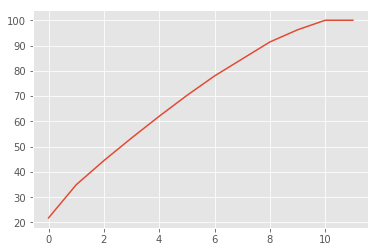

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

pca = PCA(n_components=12)
pca.fit(X)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)
plt.plot(var1)
plt.show()

In [9]:
pca = PCA(n_components=10)
pca.fit(X)
X1=pca.fit_transform(X)

print (X1)

[[-0.62330658  1.08429241  0.5908781  ..., -0.52264756 -0.79824354
   1.02028478]
 [ 0.01344085 -0.63565563  0.0875708  ...,  0.80640106  0.02146833
  -0.09254478]
 [-0.70276406 -0.23029422 -0.22887709 ..., -0.63560809 -1.28337858
  -0.52442712]
 ..., 
 [ 1.1313851  -0.29081077  0.52127816 ..., -0.4987848  -0.04730561
  -0.25118978]
 [ 0.81595348 -0.83801381  0.30059838 ..., -0.33208989  0.57901375
   0.2738081 ]
 [-0.76378963  2.35514103 -1.96016729 ...,  0.76109614 -0.07072173
  -0.42262484]]
